In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras

In [3]:
#Listing down physical devices which are available for use by Tensorflow
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
#check if Tensorflow is built with Cuda
if tf.test.is_built_with_cuda():
    print("Tensorflow is built with CUDA")
else:
    print("Tensorflow is not built with CUDA")

Tensorflow is not built with CUDA


In [5]:
#load the Cifar10 Dataset
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

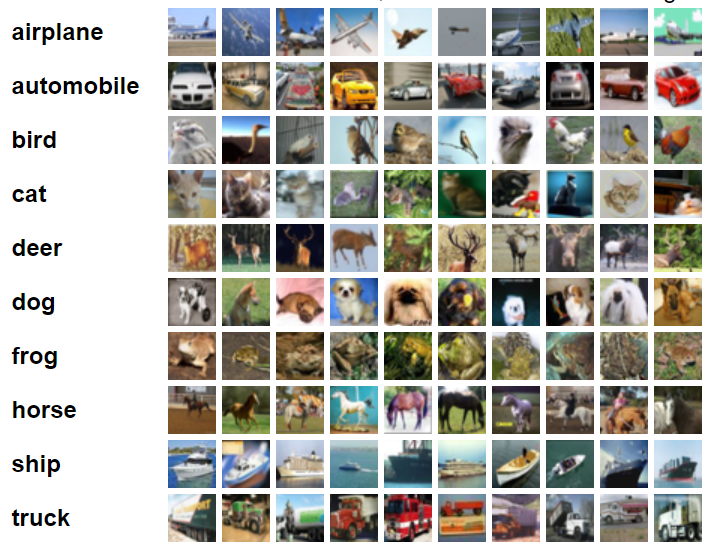

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
# Each element in the array is a 3-element list (like [59, 62, 63]), which represents the RGB values of a single pixel.

# The first value (59) is the intensity of the red channel.
# The second value (62) is the intensity of the green channel.
# The third value (63) is the intensity of the blue channel.
X_train[0].shape

(32, 32, 3)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
def plot_sample(index):
    plt.figure(figsize= (10,1))
    plt.imshow(X_train[index])

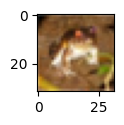

In [10]:
plot_sample(0)

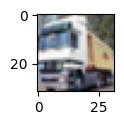

In [11]:
plot_sample(1)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
y_train[3]

array([4], dtype=uint8)

In [14]:
classes[y_train[3][0]]

'deer'

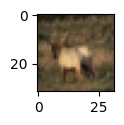

In [15]:
plot_sample(3)

In [16]:
classes[y_train[3][0]]

'deer'

In [17]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [24]:
from tensorflow.keras.utils import to_categorical

# Converting y_train and y_test to categorical values (one-hot encoding)
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

y_test_categorical[:5]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [28]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 56ms/step - accuracy: 0.3028 - loss: 1.9324
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 59ms/step - accuracy: 0.4175 - loss: 1.6511
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 60ms/step - accuracy: 0.4501 - loss: 1.5543
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 60ms/step - accuracy: 0.4745 - loss: 1.4860
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 60ms/step - accuracy: 0.4938 - loss: 1.4341
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.5105 - loss: 1.3900
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 61ms/step - accuracy: 0.5247 - loss: 1.3597
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 60ms/step - accuracy: 0.5384 - loss: 1.3237
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 62ms/step - accuracy: 0.5491 - loss: 1.2889
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.5586 - loss: 1.2563


In [38]:
y_pred = model.predict(X_test_scaled)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [34]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


3

In [30]:
y_test[0]

array([3], dtype=uint8)

In [32]:
classes[y_test[0][0]]

'cat'

In [35]:
classes[y_test[1][0]]

'ship'

In [40]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.4959 - loss: 1.4285


[1.4370954036712646, 0.48750001192092896]

Measure training time on a CPU

In [41]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [42]:
%%timeit -n1 -r1 #it is used to measure the time it used to excecute one cell
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

c:\Users\Randy\Desktop\Python\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 62ms/step - accuracy: 0.3030 - loss: 1.9325
1min 40s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
